## Clustering methods - comprehensive study
[필사 원본 링크](https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study)

Clustering is one of the most frequently used forms of unsupervised learning. 
It automatically discover natural grouping in data.

Clustering is especially useful for exploring data you know nothing about. 
You might find connections you never would have thought of. 
Clustering can also be useful as a type of feature engineering, where existing and new examples can be mapped and labeled as belonging to one of the identified clusters in the data.

Some typical real world applications of clustering include fraud detection, categorizing books in a library or customer segmentation in marketing.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

# 경고 문구 무시
import warnings
warnings.filterwarnings('ignore')

[clustering-exercises data 링크](https://www.kaggle.com/datasets/joonasyoon/clustering-exercises)

In [2]:
# clustering-exercises data
blob_df = pd.read_csv("../data/e-commerce/blob.csv")
dart_df = pd.read_csv("../data/e-commerce/dart.csv")
outliers_df = pd.read_csv("../data/e-commerce/outliers.csv")
spiral2_df = pd.read_csv("../data/e-commerce/spiral2.csv")
basic2_df = pd.read_csv("../data/e-commerce/basic2.csv")
boxes3_df = pd.read_csv("../data/e-commerce/boxes3.csv")

# 이커머스 데이터
raw_df = pd.read_csv("../data/e-commerce/data.csv", encoding= 'unicode_escape')

In [3]:
display(blob_df.head())
display(raw_df.head())

x           y  color
0  199.115034   72.641121      1
1  196.880523  247.744708      2
2   88.426271  233.962425      2
3  118.578789  264.044188      2
4  249.572490  260.896521      0

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

## clustering-exercises data 시각화

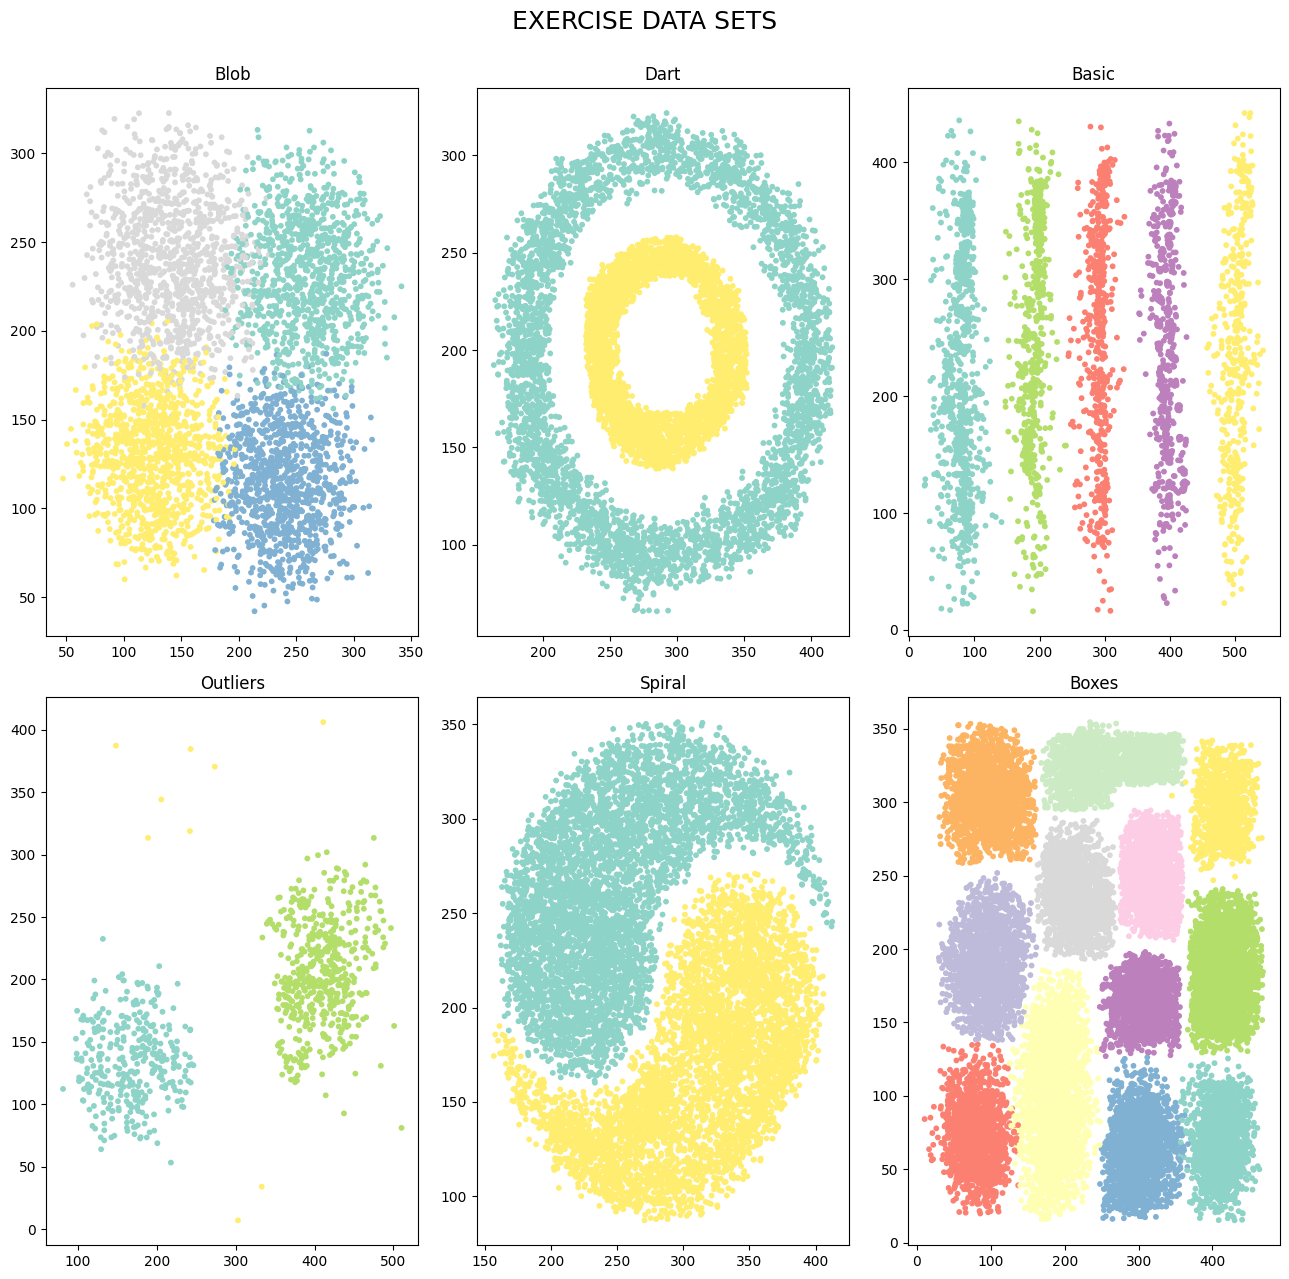

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(13,13))
fig.suptitle('EXERCISE DATA SETS\n', size = 18)

# s= scatter 점 사이즈
axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Blob");

axes[0,1].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[0,1].set_title("Dart");

axes[0,2].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[0,2].set_title("Basic");

axes[1,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Outliers");

axes[1,1].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[1,1].set_title("Spiral");

axes[1,2].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[1,2].set_title("Boxes");

plt.tight_layout()

## Feature engineering

In [5]:
print(raw_df.shape)
raw_df.head()

(541909, 8)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [6]:
raw_df.describe(include='all')

InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   80995.000000   

             InvoiceDate      UnitPrice     CustomerID         Country  
count             541909  541909.000000  406829.000000          541909  
unique             23260            NaN            NaN              38  
top     10/31/2011 14:41            NaN            NaN  United Kingdom  
freq                1114            NaN            NaN          495478  
mean                 NaN       4.611114   15287.690570             NaN  
std                  NaN      96.759853    1713.600303             NaN  
min                  NaN  -11062.060000   12346.000000             NaN  
25%                  NaN       1.250000   13953.000000             NaN  
50%                  NaN       2.080000   15152.000000             NaN  
75%                  NaN       4.130000   16791.000000             NaN  
max                  NaN   38970.000000   18287.000000             NaN

### column 제거

In [7]:
# dropping columns
# 남은 column들을 보아하니 고객 분류를 위해 제품 가격, 수량, 주문 번호, 고객 번호만 남긴 것으로 추정
raw_df.drop(['StockCode', 'InvoiceDate','Description','Country'], axis=1, inplace=True)
raw_df.head()

InvoiceNo  Quantity  UnitPrice  CustomerID
0    536365         6       2.55     17850.0
1    536365         6       3.39     17850.0
2    536365         8       2.75     17850.0
3    536365         6       3.39     17850.0
4    536365         6       3.39     17850.0

In [8]:
# 구매 수량과 제품 가격에 음수가 있는 것을 확인
# 환불을 의미
# 환불은 이커머스에서 중요한 요소이나 구매 데이터만 한정하여 사용
print(raw_df["Quantity"].min())
print(raw_df["UnitPrice"].min())

-80995
-11062.06


In [9]:
df = raw_df.loc[raw_df["Quantity"] > 0]
df = df.loc[df["UnitPrice"] > 0]

In [10]:
print(df["Quantity"].min())
print(df["UnitPrice"].min())

1
0.001


### 파생변수 : Total

In [11]:
# 주문 가격 = 제품 수량 * 제품 가격
df["Total"] = df["Quantity"] * df["UnitPrice"]
df.head(2)

InvoiceNo  Quantity  UnitPrice  CustomerID  Total
0    536365         6       2.55     17850.0  15.30
1    536365         6       3.39     17850.0  20.34

In [12]:
# 수량, 가격 col 삭제
df.drop(["Quantity", "UnitPrice"], axis=1, inplace=True)

In [13]:
print("결측치 제거 전")
print(df.isnull().sum())
df.dropna(axis=0, inplace=True)
print("-" * 20)
print("결측치 제거 전")
print(df.isnull().sum())

결측치 제거 전
InvoiceNo          0
CustomerID    132220
Total              0
dtype: int64
--------------------
결측치 제거 전
InvoiceNo     0
CustomerID    0
Total         0
dtype: int64


### 파생변수
* Frequency : total number of transactions
* Amount : total amount of transactions

In [14]:
# Amount
# 고객 아이디 기준 주문 금액 합계
Amount = df.groupby("CustomerID")["Total"].sum()
Amount = Amount.reset_index()
Amount.columns=['CustomerID','Amount']
Amount.head()

CustomerID    Amount
0     12346.0  77183.60
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40

In [15]:
# Frequency
# 고객 아이디 기준 주문 번호 개수
Frequency = df.groupby('CustomerID')['InvoiceNo'].count()
Frequency = Frequency.reset_index()
Frequency.columns = ['CustomerID','Frequency']
Frequency.head()

CustomerID  Frequency
0     12346.0          1
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17

In [16]:
# merge both df
# 고객 아이디 기준 두 df inner merge
df1 = pd.merge(Amount, Frequency, on='CustomerID', how='inner')
df1.head()

CustomerID    Amount  Frequency
0     12346.0  77183.60          1
1     12347.0   4310.00        182
2     12348.0   1797.24         31
3     12349.0   1757.55         73
4     12350.0    334.40         17

In [86]:
# 고객 아이디 column 제거
df1.drop(['CustomerID'], axis=1, inplace=True)
df1.head()

Amount  Frequency
0  77183.60          1
1   4310.00        182
2   1797.24         31
3   1757.55         73
4    334.40         17

### 이상치

In [87]:
df1.describe(include='all')

Amount    Frequency
count    4338.000000  4338.000000
mean     2054.266460    91.720609
std      8989.230441   228.785094
min         3.750000     1.000000
25%       307.415000    17.000000
50%       674.485000    41.000000
75%      1661.740000   100.000000
max    280206.020000  7847.000000

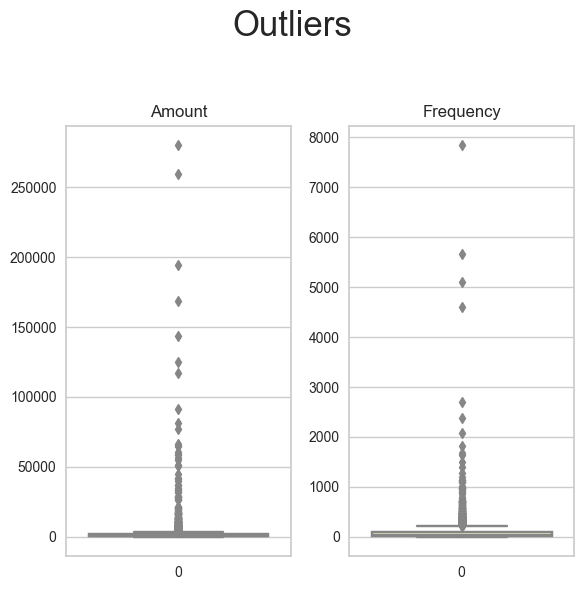

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df1['Amount'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=df1['Frequency'], palette='Spectral').set_title("Frequency")

# tight_layout
# 자동으로 명시된 여백(padding)에 관련된 subplot 파라미터를 조정
# 모든 키워드 인자는 선택적으로 입력 가능
# 입력 없이 사용할 경우 기본값을 이용하여 자동으로 레이아웃 설정
plt.tight_layout()

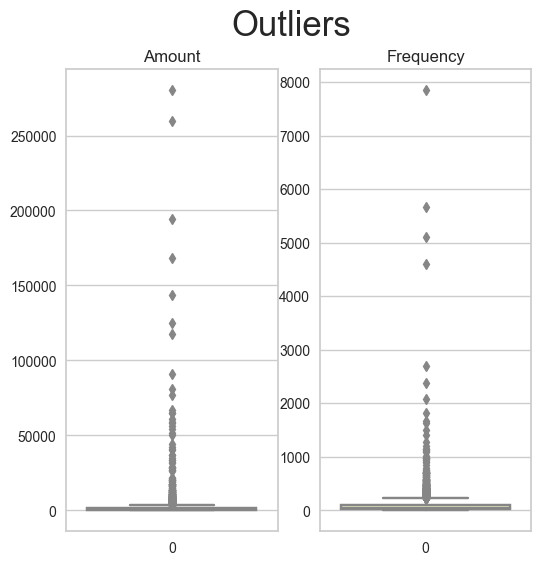

In [89]:
# plt.show()를 이용하여 같은 시각화 코드 출력
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df1['Amount'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=df1['Frequency'], palette='Spectral').set_title("Frequency")

plt.show()

Outlier detection model selection
* distribution is not normal
* distribution is highly skewed
* we have huge outliers

In [90]:
from sklearn.ensemble import IsolationForest

df2 = df1.copy()

In [91]:
model = IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df2)

IsolationForest(contamination=0.1, n_estimators=150)

* decision_function
  * Average anomaly score of X of the base classifiers.
  * The anomaly score of an input sample is computed as the mean anomaly score of the trees in the forest.
  * The lower, the more abnormal. Negative scores represent outliers, positive scores represent inliers.
* predict
  * Predict if a particular sample is an outlier or not.
  * -1 = 이상치
  * 1 = 정상 데이터

In [92]:
scores = model.decision_function(df2)
anomaly = model.predict(df2)

df2['scores'] = scores
df2['anomaly'] = anomaly
df2.head()

Amount  Frequency    scores  anomaly
0  77183.60          1 -0.291124       -1
1   4310.00        182  0.024508        1
2   1797.24         31  0.085821        1
3   1757.55         73  0.094816        1
4    334.40         17  0.140414        1

In [93]:
# 이상치 데이터만 추출
anomaly = df2.loc[df2['anomaly'] == -1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))
anomaly.head()

Total number of outliers is: 434


Amount  Frequency    scores  anomaly
0   77183.60          1 -0.291124       -1
10   6207.67        131 -0.037411       -1
12   6372.58        248 -0.050576       -1
15   5226.23        266 -0.029181       -1
50  11072.67        109 -0.121817       -1

In [94]:
# 이상치 제거 후 reset_index
df2 = df2.drop(anomaly_index, axis=0).reset_index(drop=True)
df2["anomaly"].value_counts()

1    3904
Name: anomaly, dtype: int64

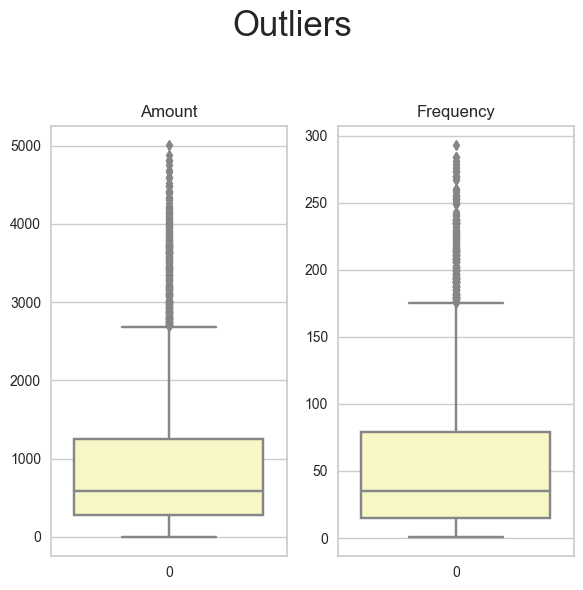

In [95]:
# 이상치 제거 후 boxplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df2['Amount'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=df2['Frequency'], palette='Spectral').set_title("Frequency")

plt.tight_layout()

In [96]:
print(df2.shape)
df2.head()

(3904, 4)


Amount  Frequency    scores  anomaly
0  4310.00        182  0.024508        1
1  1797.24         31  0.085821        1
2  1757.55         73  0.094816        1
3   334.40         17  0.140414        1
4  2506.04         85  0.072118        1

In [97]:
# 이상치를 제거하기 위해 만들었던 score, anomaly 
# 이상치를 제거했으니 제거
df2.drop(['scores', 'anomaly'], axis=1, inplace=True)
df2.head()

Amount  Frequency
0  4310.00        182
1  1797.24         31
2  1757.55         73
3   334.40         17
4  2506.04         85

### 스케일링

In [98]:
df2.skew()

Amount       1.677049
Frequency    1.550823
dtype: float64

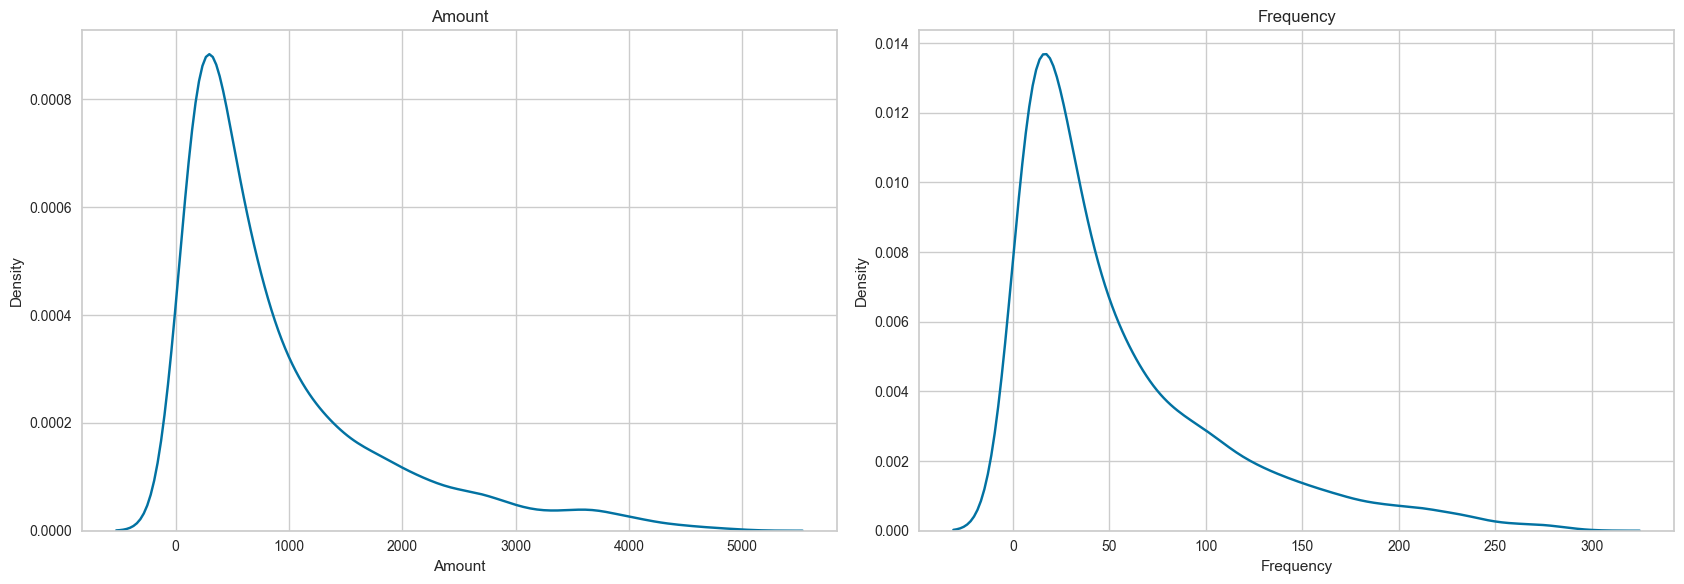

In [99]:
# 왜도가 양수, 오른쪽으로 긴 꼬리
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,6))

sns.kdeplot(ax=axes[0], data=df2['Amount'], palette='Spectral').set_title("Amount")
sns.kdeplot(ax=axes[1], data=df2['Frequency'], palette='Spectral').set_title("Frequency")
plt.tight_layout()

In [100]:
# 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df3 = scaler.fit_transform(df2)

In [101]:
# 평균과 표준편차 각각 0과 1에 가까운 것 확인
print(df3.mean(0))
print(df3.std(0))

[-7.28015098e-18  5.55111512e-17]
[1. 1.]


## Determining The Optimal Number Of Clusters
* 최적의 클러스터 개수 결정

### Elbow method
* Cluster 간의 거리의 합을 나타내는 inertia
* inertia가 급격히 떨어지는 구간의 K 값을 군집의 개수로 사용
* inertia_ 속성으로 확인

<br>

[설명 영상](https://www.youtube.com/watch?v=efKGmOH4Y_A&ab_channel=CrazyLand)
* init 파라미터의 default 값 : k-mean++
* k-mean++는 초기 Centroid를 정하는 방법 중 하나
* 먼저 맨 처음 데이터를 centroid1로 설정
* enctoid1으로부터 가장 멀리 떨어져 있는 데이터를 centroid2로 설정
* centroid2로부터 가장 멀리 떨어져 있는 데이터를 centroid3로 설정
* 이렇게 K번 반복하여 초기 centroid를 설정
* 임의로 정하거나 랜덤하게 정하는 것보다 적은 iteration으로 효율적

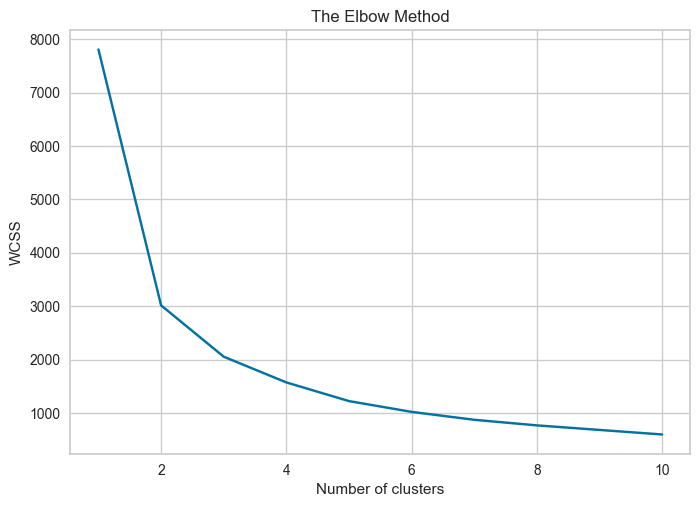

In [102]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

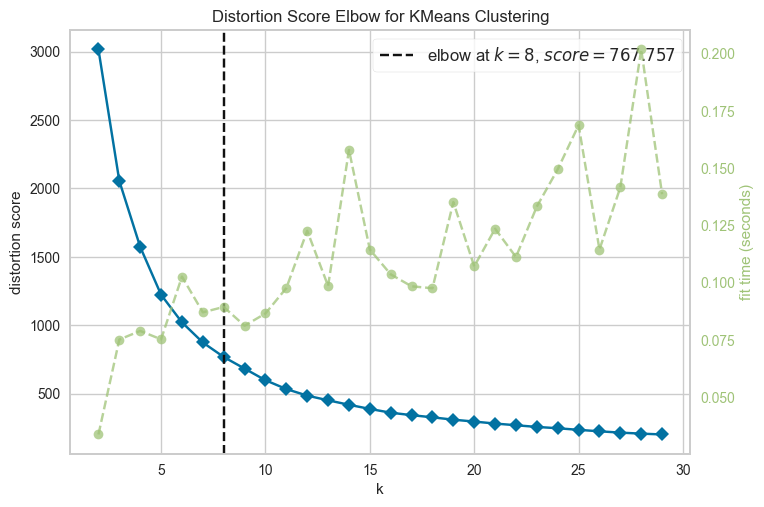

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [103]:
# x축 : k의 개수
# 파란선 : 군집 중심과의 평균 거리
# 녹색선 : 학습 시간
# 검은 직선 : 추천 k=7
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

visualizer = KElbowVisualizer(model, k=(2, 30), timings=True)
visualizer.fit(df3)
visualizer.show()   

### Silhouette method
* 군집 타당성 지표인 실루엣 점수를 활용
* 군집화의 질을 수치화
* 같은 클러스터 내 거리 기반 유사도는 크고, 인접한 클러스타 간 거리 기반 유사도는 작다면 군집화가 잘된 것으로 판단
* 실루엣 점수의 범위 = [-1, 1]
* 1에 가까울 수록 적절한 군집화

In [104]:
from sklearn.metrics import silhouette_score

# Instantiate the KMeans for 5 clusters
km = KMeans(n_clusters=5, random_state=42)
# Fit the KMeans model
km.fit_predict(df3)

# Calculate Silhoutte Score
score = silhouette_score(df3, km.labels_, metric='euclidean')

# Print the score
print(f'Silhouetter Average Score: {score:.3f}')

Silhouetter Average Score: 0.476


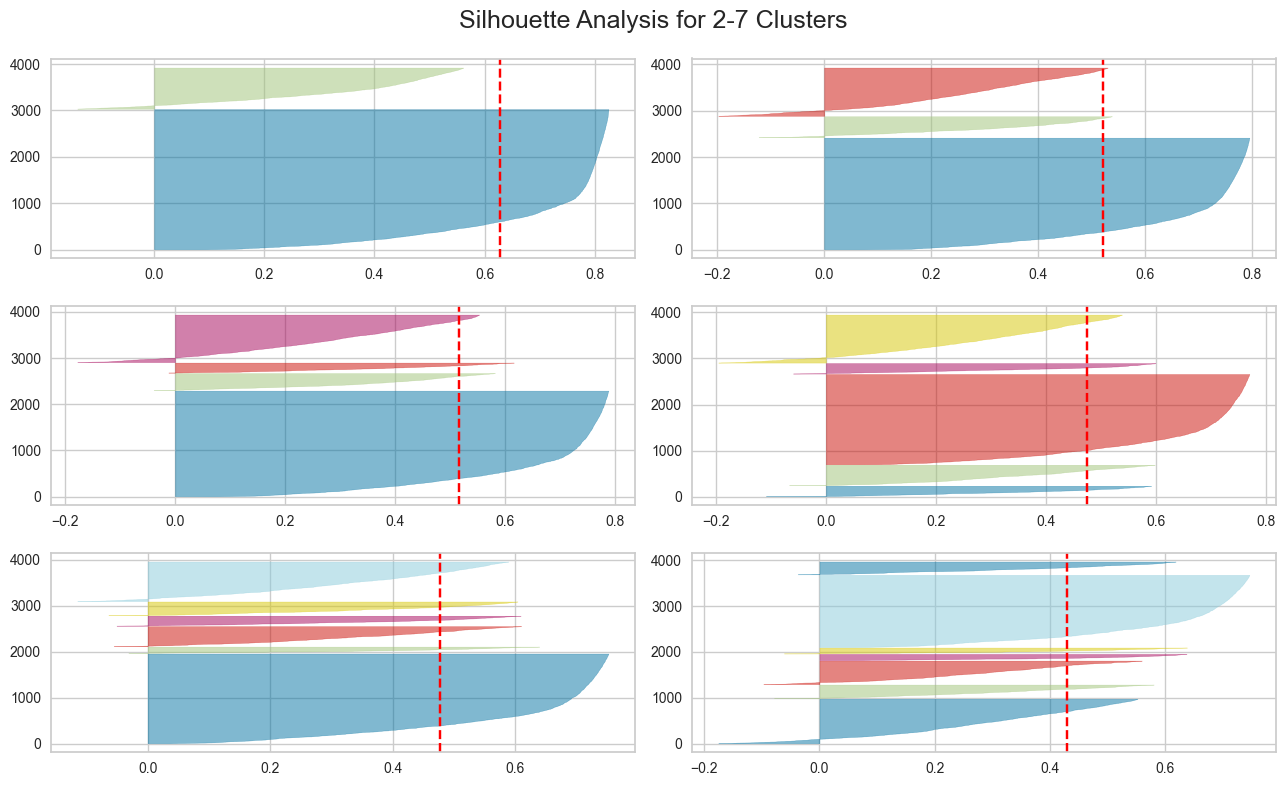

In [105]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(13,8))
fig.suptitle('Silhouette Analysis for 2-7 Clusters', size = 18)
plt.tight_layout()

# 빨간 선 : 실루엣 계수의 전체 평균
for i in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df3)

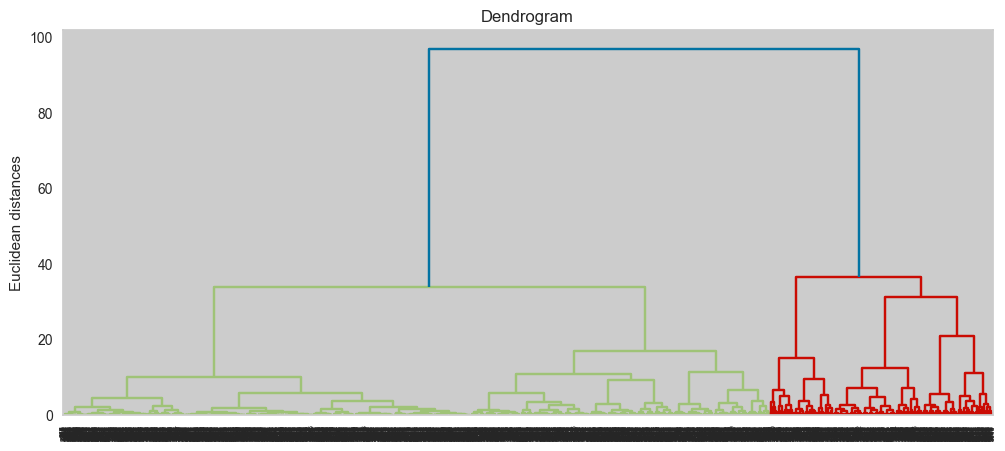

In [106]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot

pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(df3, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

## K-Means

In [107]:
df_kmeans = df3.copy()
df_blob_kmeans = blob_df.copy()
df_dart_kmeans = dart_df.copy()
df_basic_kmeans = basic2_df.copy()
df_outliers_kmeans = outliers_df.copy()
df_spiral2_kmeans = spiral2_df.copy()
df_boxes3_kmeans = boxes3_df.copy()

In [108]:
df_blob_kmeans.drop(['color'], axis=1, inplace=True)
df_dart_kmeans.drop(['color'], axis=1, inplace=True)
df_basic_kmeans.drop(['color'], axis=1, inplace=True)
df_outliers_kmeans.drop(['color'], axis=1, inplace=True)
df_spiral2_kmeans.drop(['color'], axis=1, inplace=True)
df_boxes3_kmeans.drop(['color'], axis=1, inplace=True)

In [109]:
# Training model
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_kmeans)

kmeans_blob = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_dart = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_basic = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans_outliers = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_spiral2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_boxes3 = KMeans(n_clusters = 12, init = 'k-means++', random_state = 42)

y_kmeans_blob = kmeans_blob.fit_predict(df_blob_kmeans)
y_kmeans_dart = kmeans_dart.fit_predict(df_dart_kmeans)
y_kmeans_basic = kmeans_basic.fit_predict(df_basic_kmeans)
y_kmeans_outliers = kmeans_outliers.fit_predict(df_outliers_kmeans)
y_kmeans_spiral2 = kmeans_spiral2.fit_predict(df_spiral2_kmeans)
y_kmeans_boxes3 = kmeans_boxes3.fit_predict(df_boxes3_kmeans)

In [110]:
df_blob_kmeans['Cluster'] = y_kmeans_blob
df_dart_kmeans['Cluster'] = y_kmeans_dart
df_basic_kmeans['Cluster'] = y_kmeans_basic
df_outliers_kmeans['Cluster'] = y_kmeans_outliers
df_spiral2_kmeans['Cluster'] = y_kmeans_spiral2
df_boxes3_kmeans['Cluster'] = y_kmeans_boxes3

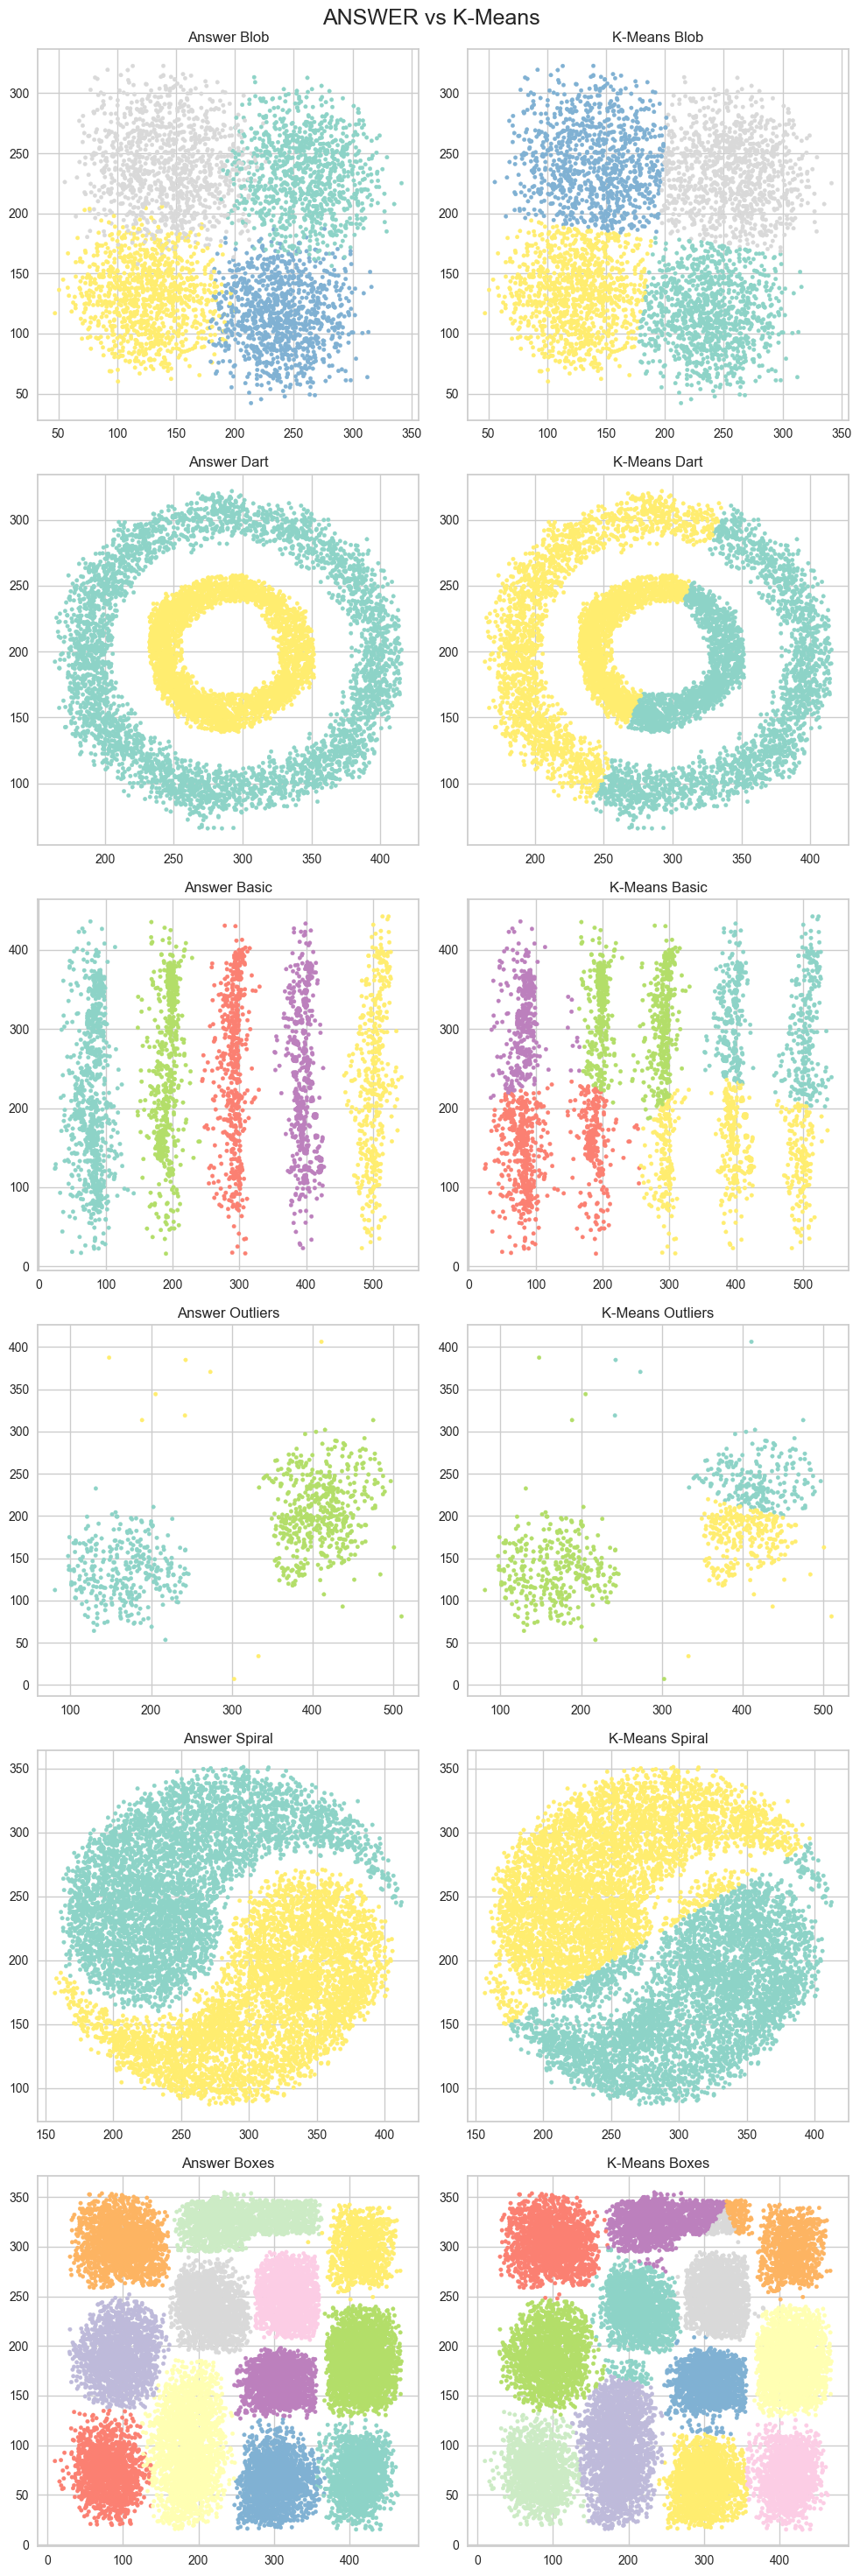

In [111]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10,30))
fig.suptitle('ANSWER vs K-Means\n', size=18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap="Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_kmeans['x'], df_blob_kmeans['y'], c=df_blob_kmeans['Cluster'], s=10, cmap="Set3")
axes[0,1].set_title("K-Means Blob");

axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_kmeans['x'], df_dart_kmeans['y'], c=df_dart_kmeans['Cluster'], s=10, cmap="Set3")
axes[1,1].set_title("K-Means Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap="Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic_kmeans['x'], df_basic_kmeans['y'], c=df_basic_kmeans['Cluster'], s=10, cmap="Set3")
axes[2,1].set_title("K-Means Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap="Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_kmeans['x'], df_outliers_kmeans['y'], c=df_outliers_kmeans['Cluster'], s=10, cmap="Set3")
axes[3,1].set_title("K-Means Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap="Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_kmeans['x'], df_spiral2_kmeans['y'], c=df_spiral2_kmeans['Cluster'], s=10, cmap="Set3")
axes[4,1].set_title("K-Means Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap="Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_kmeans['x'], df_boxes3_kmeans['y'], c=df_boxes3_kmeans['Cluster'], s=10, cmap="Set3")
axes[5,1].set_title("K-Means Boxes");

plt.tight_layout()

In [112]:
df_kmeans = df2.copy()

df_kmeans['Cluster'] = y_kmeans
df_kmeans['Cluster'].value_counts()

0    1952
5     859
2     435
4     299
3     218
1     141
Name: Cluster, dtype: int64

<AxesSubplot: xlabel='Amount', ylabel='Frequency'>

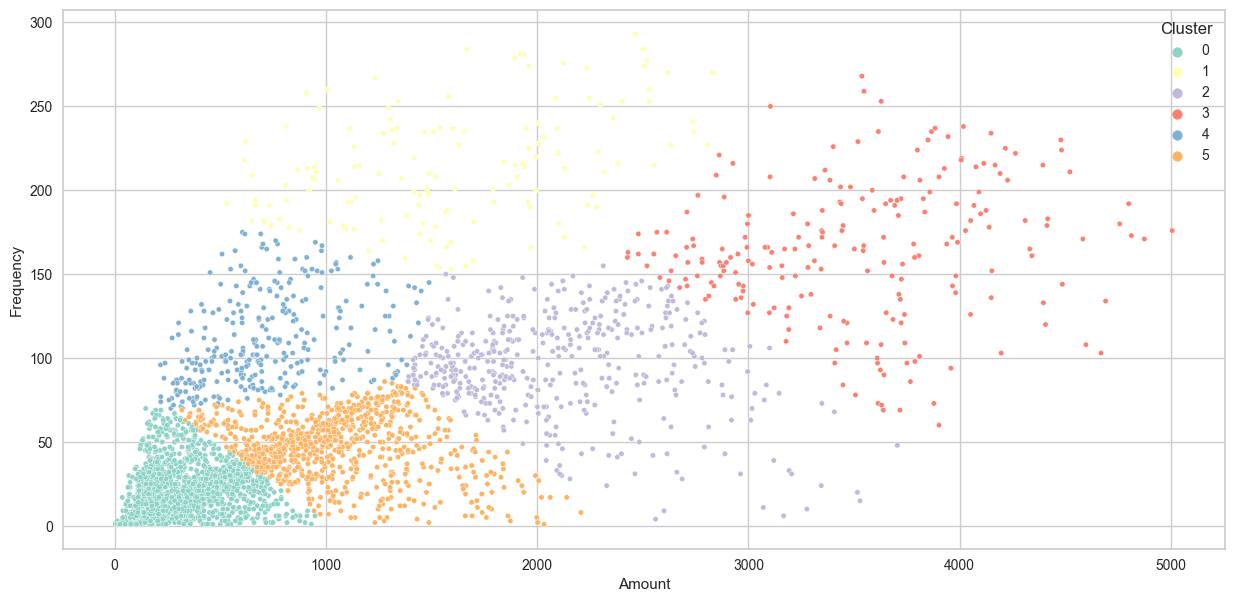

In [113]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_kmeans, x='Amount', y='Frequency', hue='Cluster', s=15, palette="Set3")

## Hierarchical clustering

In [114]:
df_AgglomerativeC = df3.copy()
df_blob_AgglomerativeC = blob_df.copy()
df_dart_AgglomerativeC = dart_df.copy()
df_basic2_AgglomerativeC = basic2_df.copy()
df_outliers_AgglomerativeC = outliers_df.copy()
df_spiral2_AgglomerativeC = spiral2_df.copy()
df_boxes3_AgglomerativeC = boxes3_df.copy()

In [115]:
df_blob_AgglomerativeC.drop(['color'], axis=1, inplace=True)
df_dart_AgglomerativeC.drop(['color'], axis=1, inplace=True)
df_basic2_AgglomerativeC.drop(['color'], axis=1, inplace=True)
df_outliers_AgglomerativeC.drop(['color'], axis=1, inplace=True)
df_spiral2_AgglomerativeC.drop(['color'], axis=1, inplace=True)
df_boxes3_AgglomerativeC.drop(['color'], axis=1, inplace=True)

In [116]:
from sklearn.cluster import AgglomerativeClustering

# Training model
AgglomerativeC = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
y_AgglomerativeC = AgglomerativeC.fit_predict(df_AgglomerativeC)

AgglomerativeC_blob = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
AgglomerativeC_dart = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
AgglomerativeC_basic = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
AgglomerativeC_outliers = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
AgglomerativeC_spiral2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
AgglomerativeC_boxes3 = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')

y_AgglomerativeC_blob = AgglomerativeC_blob.fit_predict(df_blob_AgglomerativeC)
y_AgglomerativeC_dart = AgglomerativeC_dart.fit_predict(df_dart_AgglomerativeC)
y_AgglomerativeC_basic = AgglomerativeC_basic.fit_predict(df_basic2_AgglomerativeC)
y_AgglomerativeC_outliers = AgglomerativeC_outliers.fit_predict(df_outliers_AgglomerativeC)
y_AgglomerativeC_spiral2 = AgglomerativeC_spiral2.fit_predict(df_spiral2_AgglomerativeC)
y_AgglomerativeC_boxes3 = AgglomerativeC_boxes3.fit_predict(df_boxes3_AgglomerativeC)

In [117]:
df_blob_AgglomerativeC['Cluster'] = y_AgglomerativeC_blob
df_dart_AgglomerativeC['Cluster'] = y_AgglomerativeC_dart
df_basic2_AgglomerativeC['Cluster'] = y_AgglomerativeC_basic
df_outliers_AgglomerativeC['Cluster'] = y_AgglomerativeC_outliers
df_spiral2_AgglomerativeC['Cluster'] = y_AgglomerativeC_spiral2
df_boxes3_AgglomerativeC['Cluster'] = y_AgglomerativeC_boxes3

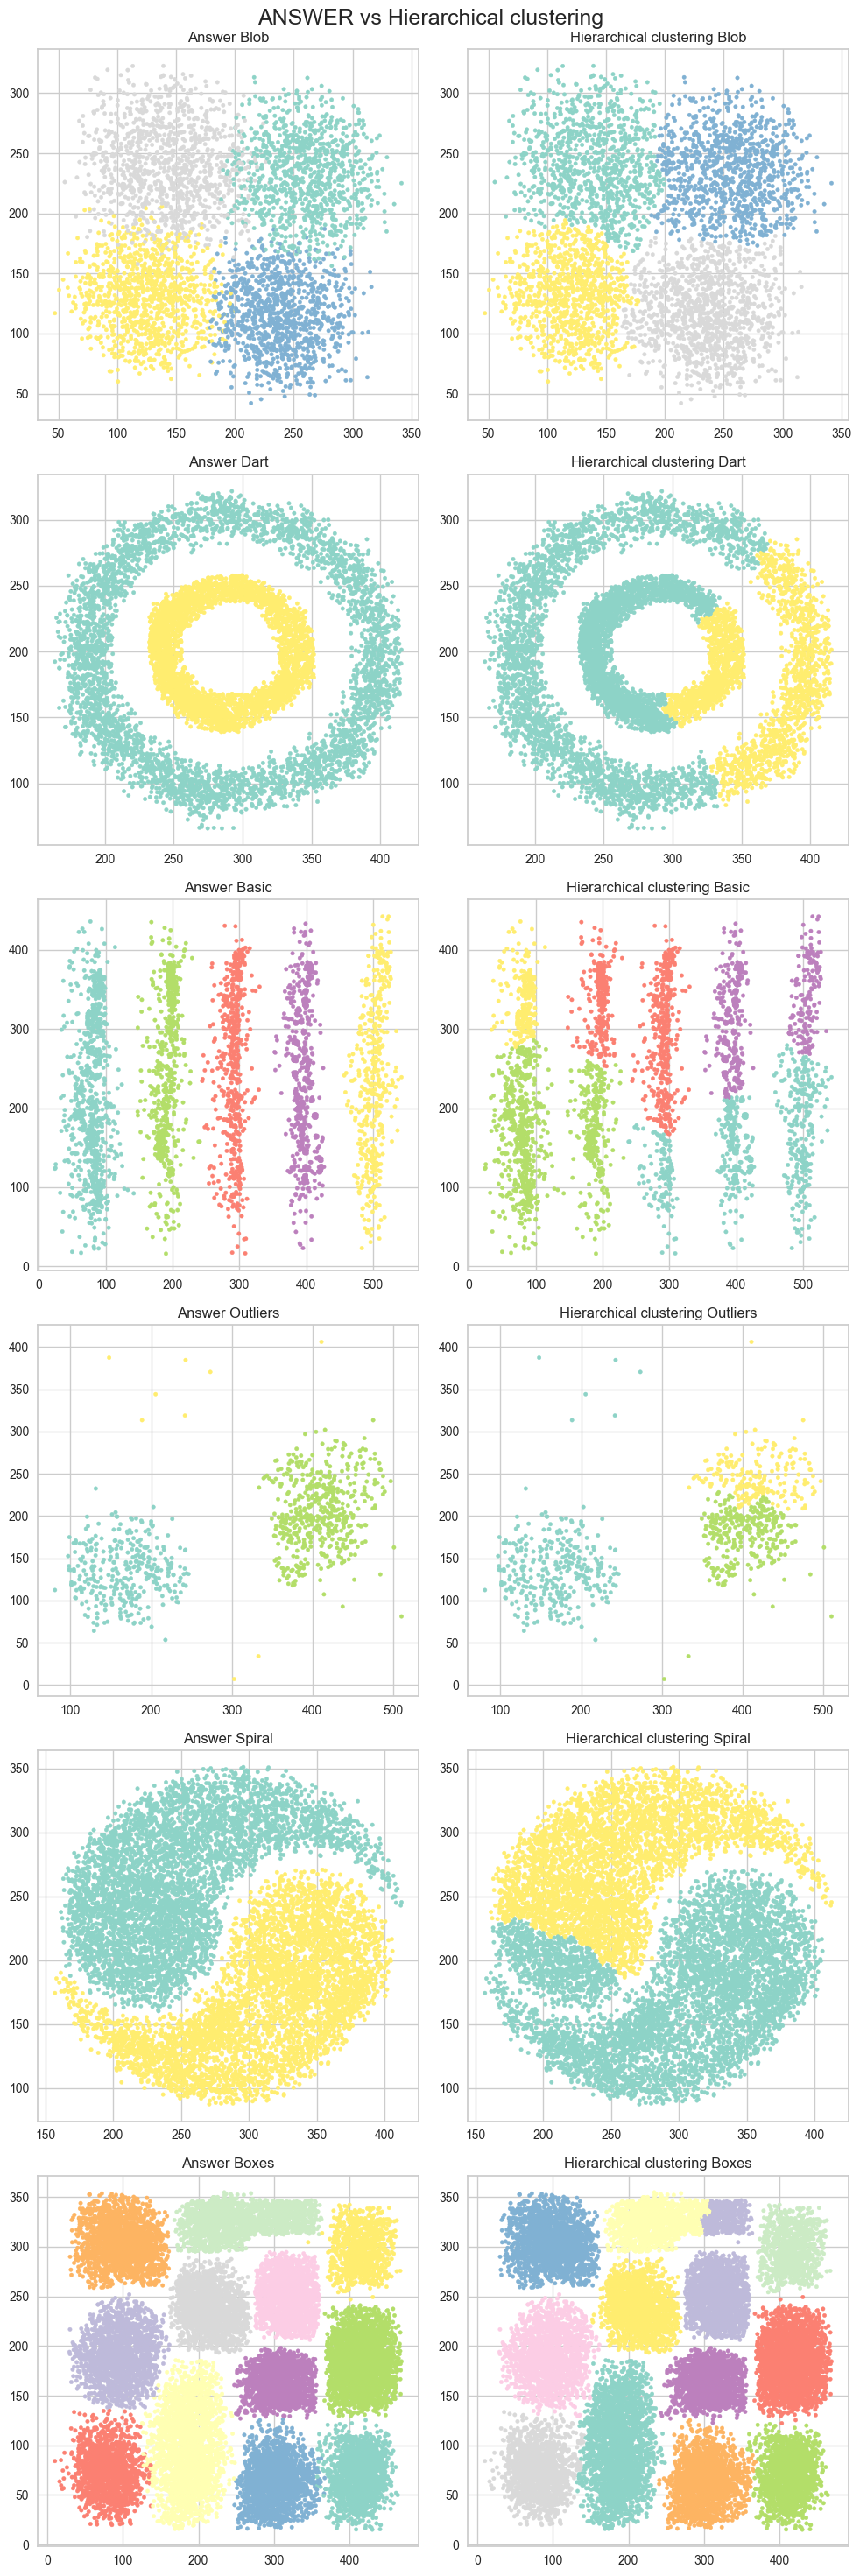

In [118]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs Hierarchical clustering\n', size=18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap="Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_AgglomerativeC['x'], df_blob_AgglomerativeC['y'], c=df_blob_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[0,1].set_title("Hierarchical clustering Blob");

axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap="Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_AgglomerativeC['x'], df_dart_AgglomerativeC['y'], c=df_dart_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[1,1].set_title("Hierarchical clustering Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap="Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic2_AgglomerativeC['x'], df_basic2_AgglomerativeC['y'], c=df_basic2_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[2,1].set_title("Hierarchical clustering Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap="Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_AgglomerativeC['x'], df_outliers_AgglomerativeC['y'], c=df_outliers_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[3,1].set_title("Hierarchical clustering Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap="Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_AgglomerativeC['x'], df_spiral2_AgglomerativeC['y'], c=df_spiral2_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[4,1].set_title("Hierarchical clustering Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap="Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_AgglomerativeC['x'], df_boxes3_AgglomerativeC['y'], c=df_boxes3_AgglomerativeC['Cluster'], s=10, cmap="Set3")
axes[5,1].set_title("Hierarchical clustering Boxes");

plt.tight_layout()

In [119]:
df_AgglomerativeC = df2.copy()

df_AgglomerativeC['Cluster'] = y_AgglomerativeC
df_AgglomerativeC['Cluster'].value_counts()

3    1713
0    1260
1     375
2     262
5     150
4     144
Name: Cluster, dtype: int64

<AxesSubplot: xlabel='Amount', ylabel='Frequency'>

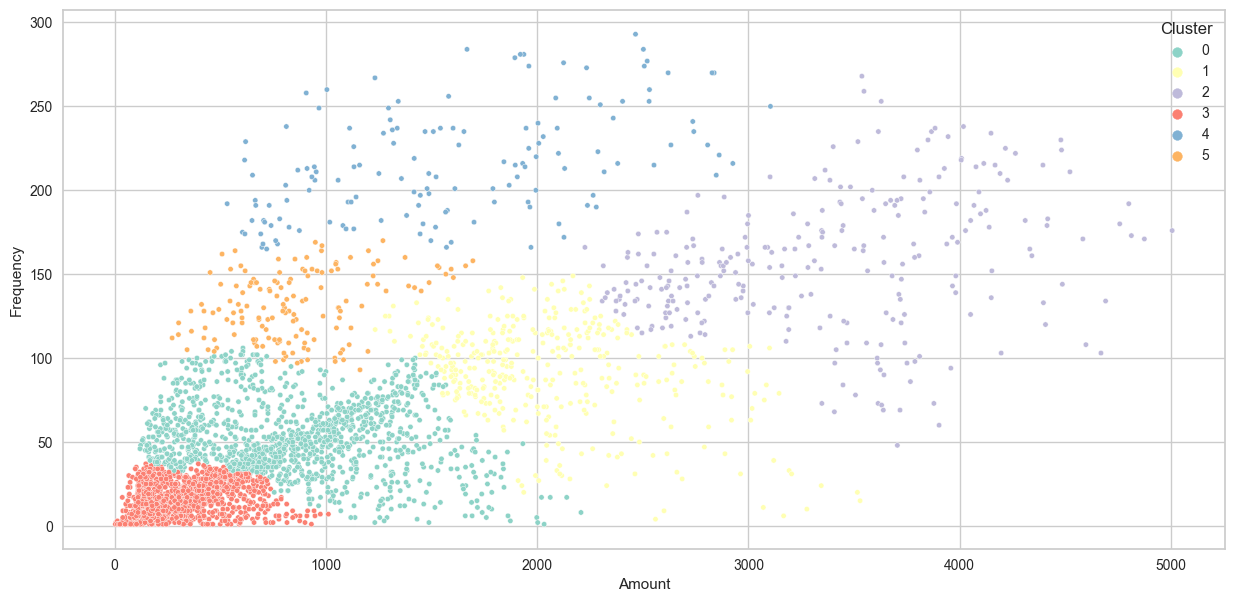

In [120]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_AgglomerativeC, x='Amount', y='Frequency', hue='Cluster', s=15, palette="Set3")

## DBSCAN clustering algorithm

In [121]:
df_DBScan = df3.copy()
df_blob_DBScan = blob_df.copy()
df_dart_DBScan = dart_df.copy()
df_basic2_DBScan = basic2_df.copy()
df_outliers_DBScan = outliers_df.copy()
df_spiral2_DBScan = spiral2_df.copy()
df_boxes3_DBScan = boxes3_df.copy()

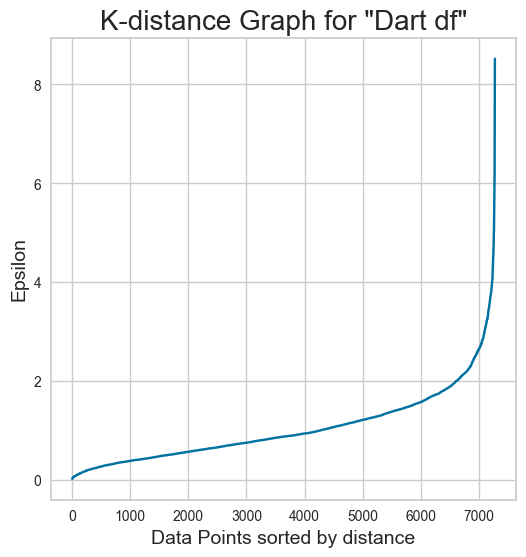

In [122]:
# The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 8 in this case.
# 최적의 거리는 8
# For MinPts I'll choose 4 (2 * dimensions)
# 클러스터 최고 점의 개수는 4
from sklearn.neighbors import NearestNeighbors

# 최근접 이웃의 수
nn = NearestNeighbors(n_neighbors=4)
nbrs = nn.fit(df_dart_DBScan)
distances, indices = nbrs.kneighbors(df_dart_DBScan)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(6, 6))
plt.plot(distances)
plt.title('K-distance Graph for "Dart df"', fontsize=20)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

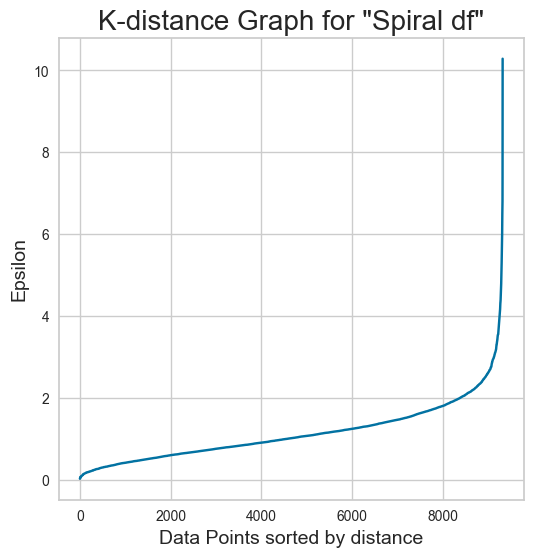

In [123]:
nn = NearestNeighbors(n_neighbors=4)
nbrs = nn.fit(df_spiral2_DBScan)
distances, indices = nbrs.kneighbors(df_spiral2_DBScan)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(6, 6))
plt.plot(distances)
plt.title('K-distance Graph for "Spiral df"', fontsize=20)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

In [124]:
df_blob_DBScan.drop(['color'], axis=1, inplace=True)
df_dart_DBScan.drop(['color'], axis=1, inplace=True)
df_basic2_DBScan.drop(['color'], axis=1, inplace=True)
df_outliers_DBScan.drop(['color'], axis=1, inplace=True)
df_spiral2_DBScan.drop(['color'], axis=1, inplace=True)
df_boxes3_DBScan.drop(['color'], axis=1, inplace=True)

In [125]:
# Training model
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=20, min_samples=9, metric='euclidean')
y_DBScan = dbscan.fit_predict(df_DBScan)

DBScan_blob = DBSCAN(eps=13, min_samples=45, metric='euclidean')
DBScan_dart = DBSCAN(eps=8, min_samples=4, metric='euclidean')
DBScan_basic = DBSCAN(eps=15, min_samples=4, metric='euclidean')
DBScan_outliers = DBSCAN(eps=20, min_samples=4, metric='euclidean')
DBScan_spiral2 = DBSCAN(eps=5.7, min_samples=4, metric='euclidean')
DBScan_boxes3 = DBSCAN(eps=6, min_samples=4, metric='euclidean')

y_DBScan_blob = DBScan_blob.fit_predict(df_blob_DBScan)
y_DBScan_dart = DBScan_dart.fit_predict(df_dart_DBScan)
y_DBScan_basic = DBScan_basic.fit_predict(df_basic2_DBScan)
y_DBScan_outliers = DBScan_outliers.fit_predict(df_outliers_DBScan)
y_DBScan_spiral2 = DBScan_spiral2.fit_predict(df_spiral2_DBScan)
y_DBScan_boxes3 = DBScan_boxes3.fit_predict(df_boxes3_DBScan)

In [126]:
df_blob_DBScan['Cluster'] = y_DBScan_blob
df_dart_DBScan['Cluster'] = y_DBScan_dart
df_basic2_DBScan['Cluster'] = y_DBScan_basic
df_outliers_DBScan['Cluster'] = y_DBScan_outliers
df_spiral2_DBScan['Cluster'] = y_DBScan_spiral2
df_boxes3_DBScan['Cluster'] = y_DBScan_boxes3

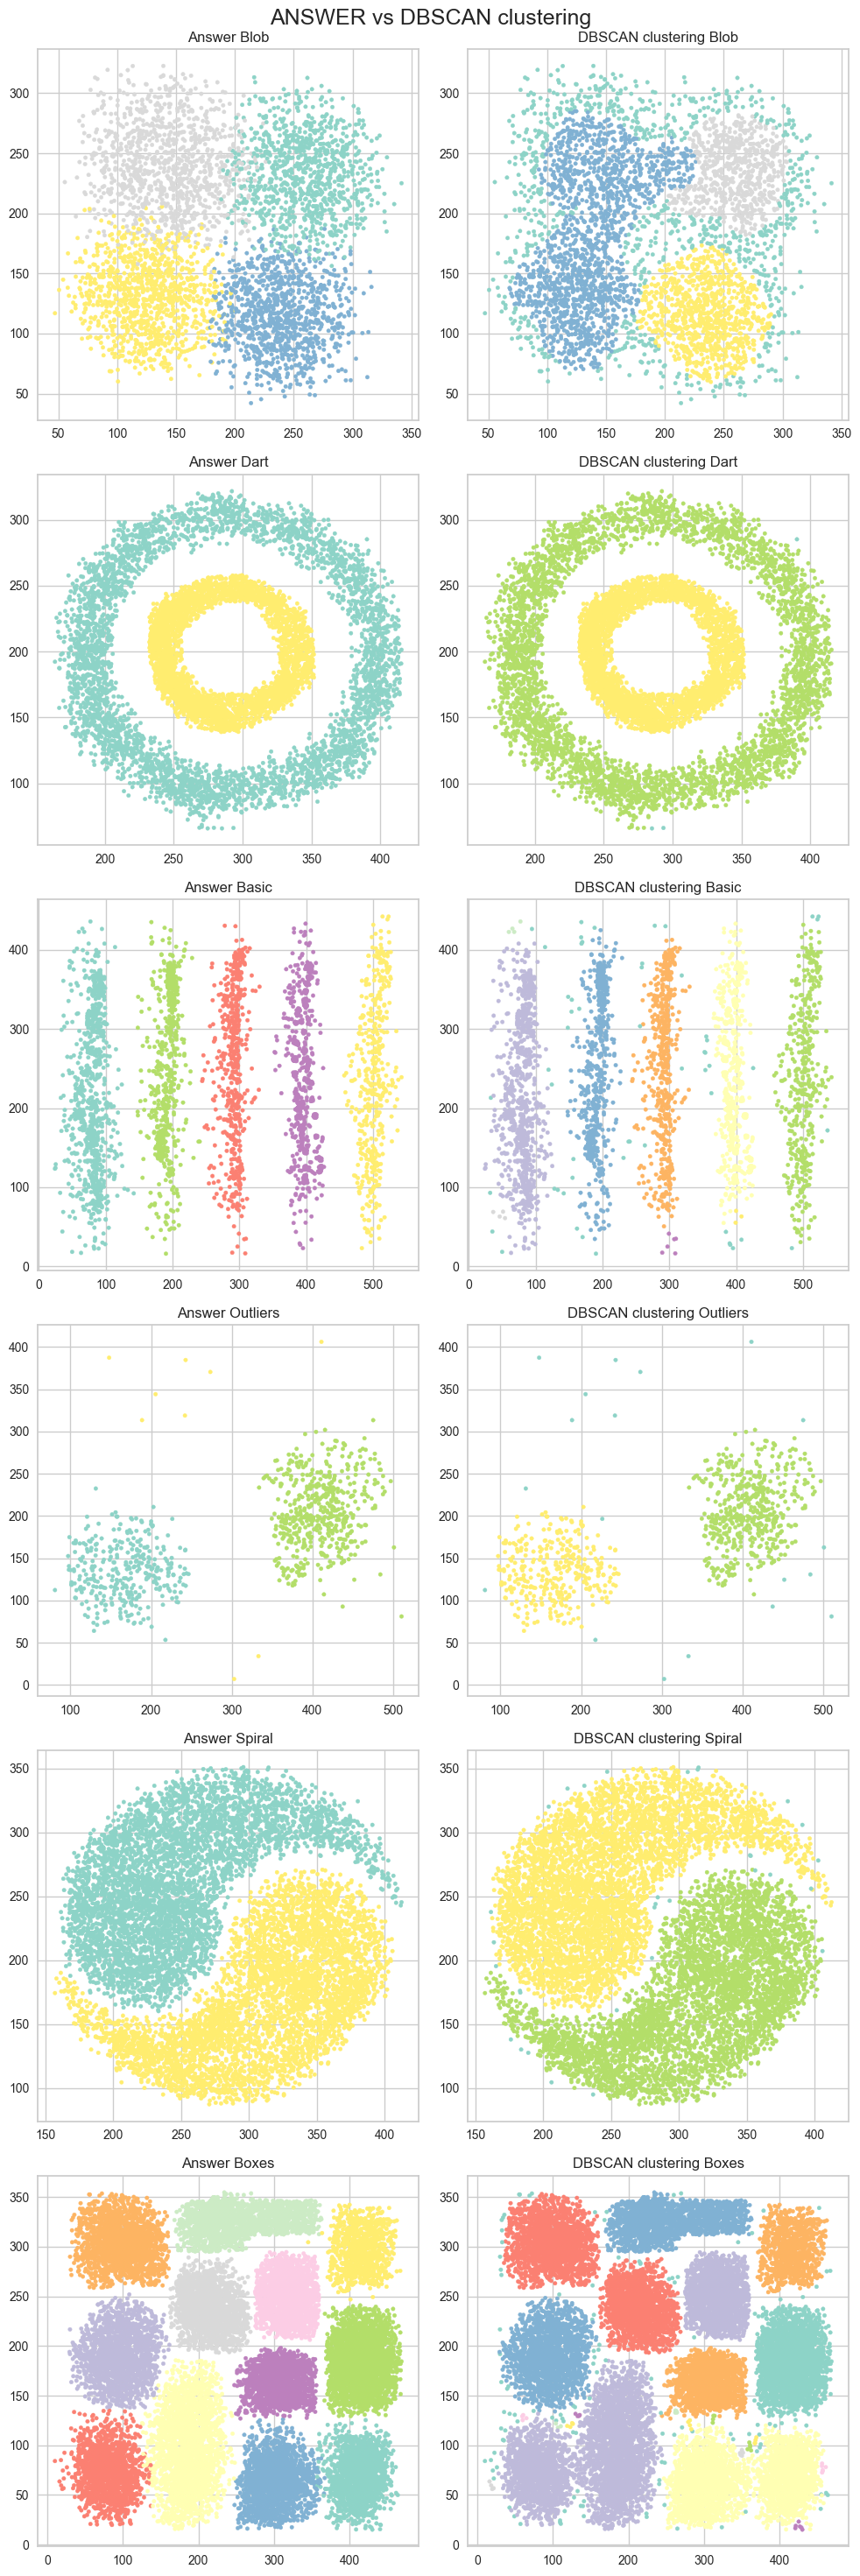

In [127]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs DBSCAN clustering\n', size=18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap="Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_DBScan['x'], df_blob_DBScan['y'], c=df_blob_DBScan['Cluster'], s=10, cmap="Set3")
axes[0,1].set_title("DBSCAN clustering Blob");

axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap="Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_DBScan['x'], df_dart_DBScan['y'], c=df_dart_DBScan['Cluster'], s=10, cmap="Set3")
axes[1,1].set_title("DBSCAN clustering Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap="Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic2_DBScan['x'], df_basic2_DBScan['y'], c=df_basic2_DBScan['Cluster'], s=10, cmap="Set3")
axes[2,1].set_title("DBSCAN clustering Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap="Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_DBScan['x'], df_outliers_DBScan['y'], c=df_outliers_DBScan['Cluster'], s=10, cmap="Set3")
axes[3,1].set_title("DBSCAN clustering Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap="Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_DBScan['x'], df_spiral2_DBScan['y'], c=df_spiral2_DBScan['Cluster'], s=10, cmap="Set3")
axes[4,1].set_title("DBSCAN clustering Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap="Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_DBScan['x'], df_boxes3_DBScan['y'], c=df_boxes3_DBScan['Cluster'], s=10, cmap="Set3")
axes[5,1].set_title("DBSCAN clustering Boxes");

plt.tight_layout()

In [128]:
df_DBScan = df2.copy()

df_DBScan['Cluster'] = y_DBScan
df_DBScan['Cluster'].value_counts()

0    3904
Name: Cluster, dtype: int64

<AxesSubplot: xlabel='Amount', ylabel='Frequency'>

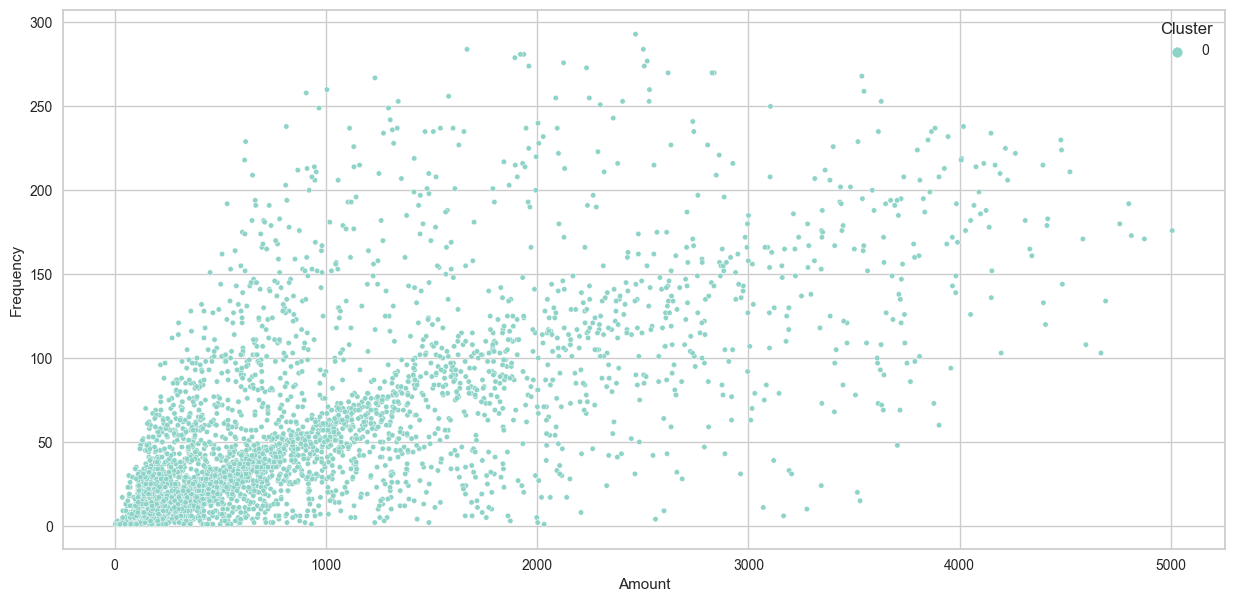

In [129]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_DBScan, x='Amount', y='Frequency', hue='Cluster', s=15, palette="Set3")

## Gaussian Mixture Models (GMM)

In [130]:
df_GMM = df3.copy()
df_blob_GMM = blob_df.copy()
df_dart_GMM = dart_df.copy()
df_basic2_GMM = basic2_df.copy()
df_outliers_GMM = outliers_df.copy()
df_spiral2_GMM = spiral2_df.copy()
df_boxes3_GMM = boxes3_df.copy()

In [131]:
df_blob_GMM.drop(['color'], axis=1, inplace=True)
df_dart_GMM.drop(['color'], axis=1, inplace=True)
df_basic2_GMM.drop(['color'], axis=1, inplace=True)
df_outliers_GMM.drop(['color'], axis=1, inplace=True)
df_spiral2_GMM.drop(['color'], axis=1, inplace=True)
df_boxes3_GMM.drop(['color'], axis=1, inplace=True)

In [132]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=8)
y_GMM = gmm.fit_predict(df_GMM)

GMM_blob = GaussianMixture(n_components=4)
GMM_dart = GaussianMixture(n_components=2)
GMM_basic = GaussianMixture(n_components=5)
GMM_outliers = GaussianMixture(n_components=3)
GMM_spiral2 = GaussianMixture(n_components=2)
GMM_boxes3 = GaussianMixture(n_components=12)

y_GMM_blob = GMM_blob.fit_predict(df_blob_GMM)
y_GMM_dart = GMM_dart.fit_predict(df_dart_GMM)
y_GMM_basic = GMM_basic.fit_predict(df_basic2_GMM)
y_GMM_outliers = GMM_outliers.fit_predict(df_outliers_GMM)
y_GMM_spiral2 = GMM_spiral2.fit_predict(df_spiral2_GMM)
y_GMM_boxes3 = GMM_boxes3.fit_predict(df_boxes3_GMM)

In [133]:
df_blob_GMM['Cluster'] = y_GMM_blob
df_dart_GMM['Cluster'] = y_GMM_dart
df_basic2_GMM['Cluster'] = y_GMM_basic
df_outliers_GMM['Cluster'] = y_GMM_outliers
df_spiral2_GMM['Cluster'] = y_GMM_spiral2
df_boxes3_GMM['Cluster'] = y_GMM_boxes3

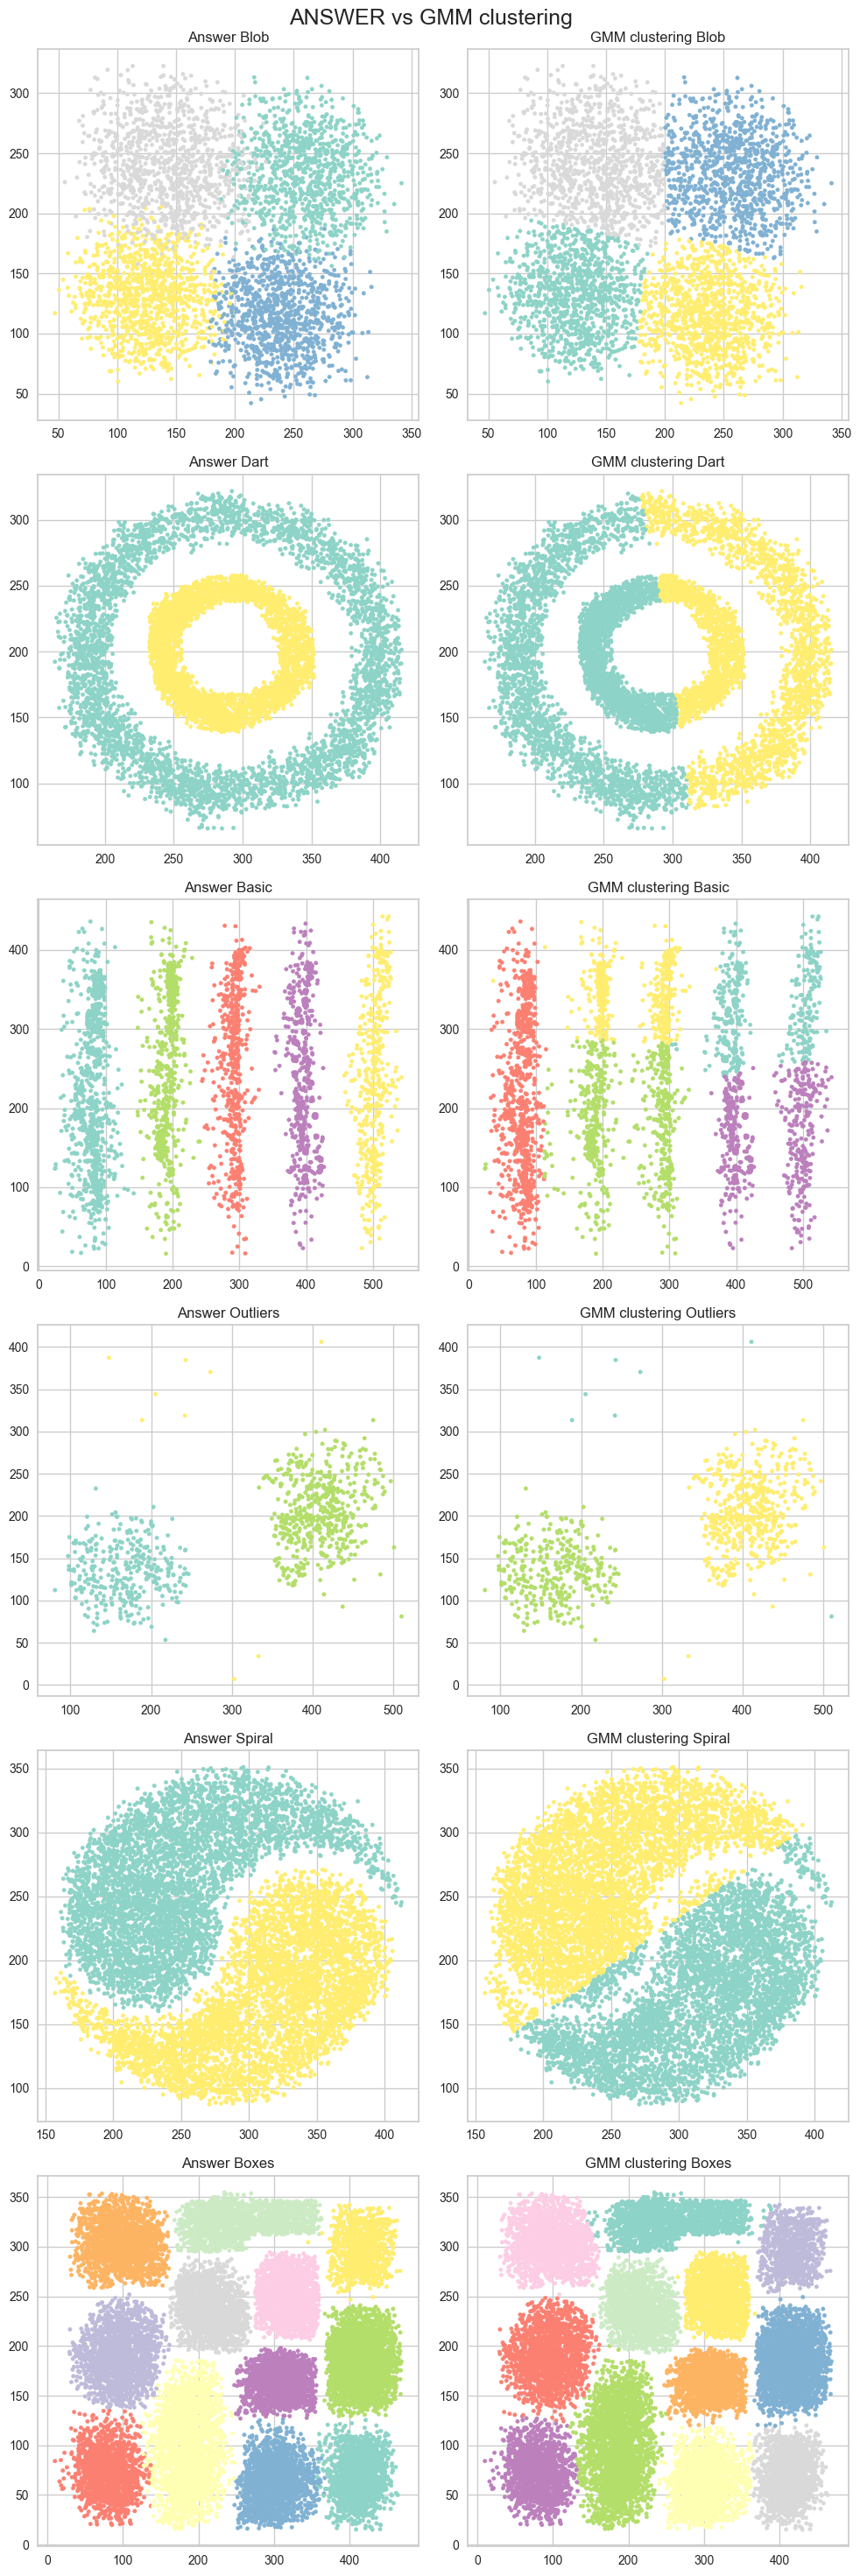

In [134]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs GMM clustering\n', size=18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap="Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_GMM['x'], df_blob_GMM['y'], c=df_blob_GMM['Cluster'], s=10, cmap="Set3")
axes[0,1].set_title("GMM clustering Blob");

axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap="Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_GMM['x'], df_dart_GMM['y'], c=df_dart_GMM['Cluster'], s=10, cmap="Set3")
axes[1,1].set_title("GMM clustering Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap="Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic2_GMM['x'], df_basic2_GMM['y'], c=df_basic2_GMM['Cluster'], s=10, cmap="Set3")
axes[2,1].set_title("GMM clustering Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap="Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_GMM['x'], df_outliers_GMM['y'], c=df_outliers_GMM['Cluster'], s=10, cmap="Set3")
axes[3,1].set_title("GMM clustering Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap="Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_GMM['x'], df_spiral2_GMM['y'], c=df_spiral2_GMM['Cluster'], s=10, cmap="Set3")
axes[4,1].set_title("GMM clustering Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap="Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_GMM['x'], df_boxes3_GMM['y'], c=df_boxes3_GMM['Cluster'], s=10, cmap="Set3")
axes[5,1].set_title("GMM clustering Boxes");

plt.tight_layout()

In [135]:
# We called the df, that's why we need to refer to previous df to add cluster numbers
df_GMM = df2.copy()
# Checking number of items in clusters and creating 'Cluster' column
df_GMM['Cluster'] = y_GMM
df_GMM['Cluster'].value_counts()

0    1116
6     990
3     514
7     441
2     382
4     206
5     133
1     122
Name: Cluster, dtype: int64

<AxesSubplot: xlabel='Amount', ylabel='Frequency'>

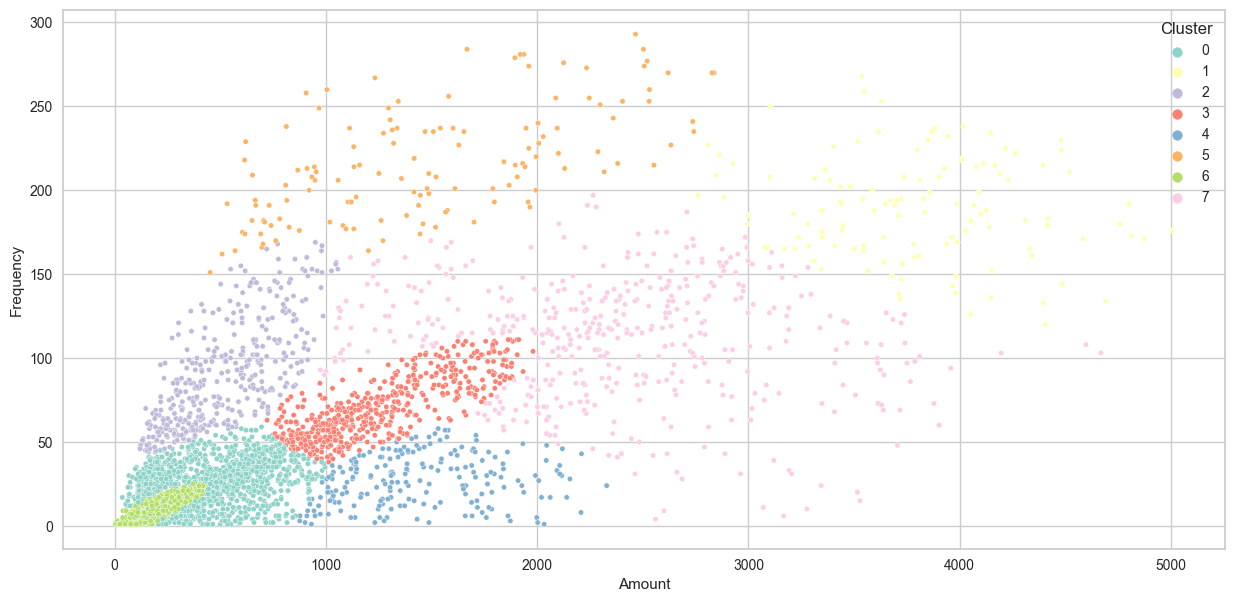

In [136]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_GMM, x='Amount', y='Frequency', hue = 'Cluster', s=15, palette="Set3")